Accuracy of KNN model is : 0.73


'0.73'

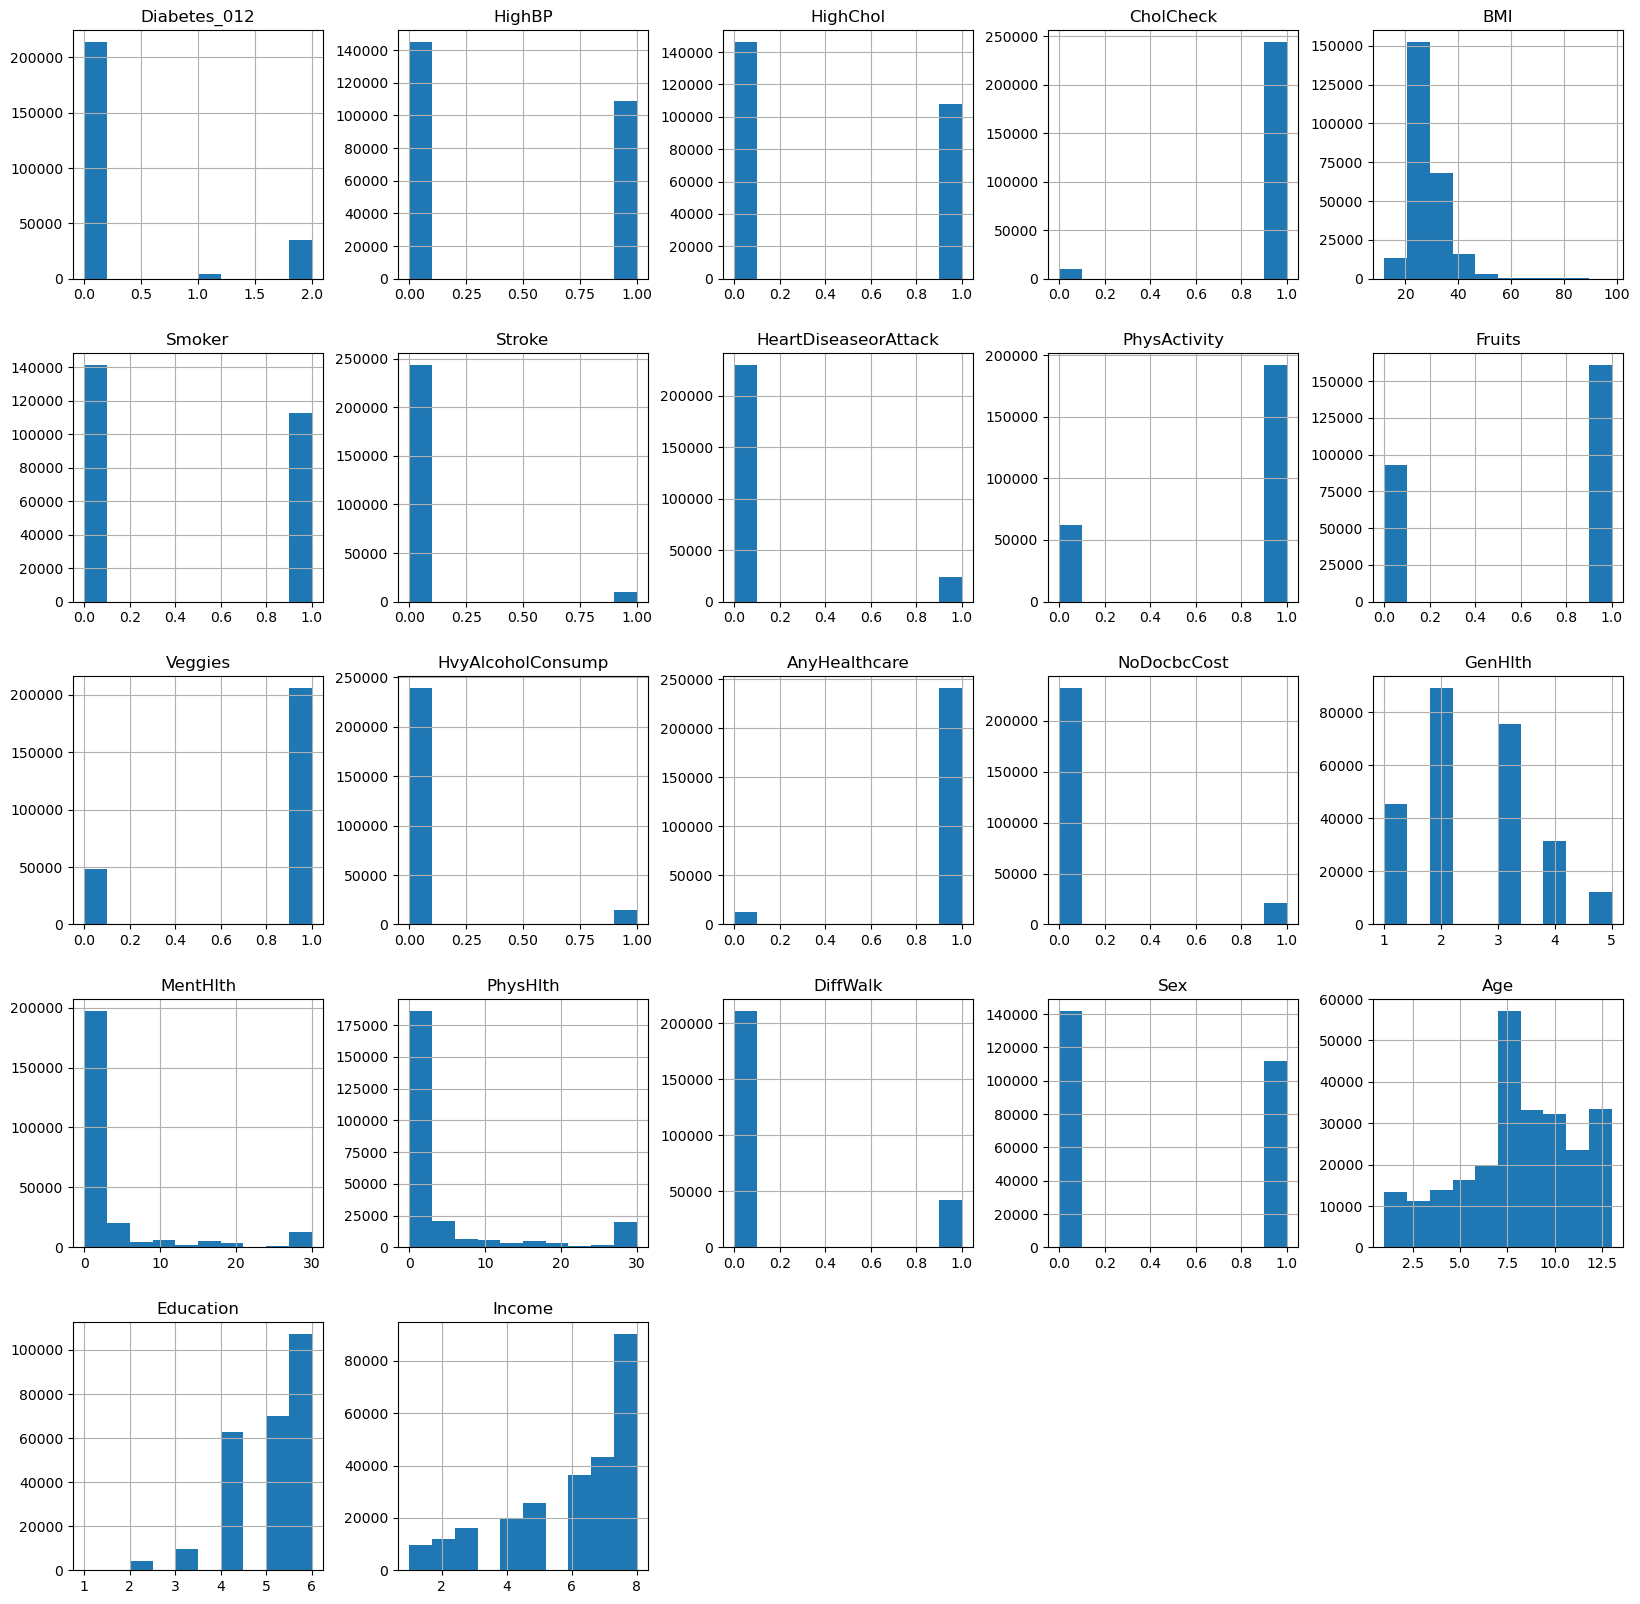

In [1]:
import pandas as pd
import bisect 
import numpy as np
import matplotlib.pylab as plt

data_frame = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
#This data set is retrived from https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv
# Below is the description of all the features being used in the data sample retrieved from above url
# Diabetes_binary,HighBp,High Chol,CholCheck,BMI ,Smoker,Stroke,PhysActivity, Fruits,Veges,yesHvyAlcoholConsum,AnyHealthCare,NoDocBcCost,GenHlth 
# MentHlth,PhysHlth,DiffWalk ,Sex ,Age ,Education ,Income 

hist_chart = data_frame.hist(figsize=(20,20))
df_1 = data_frame.iloc[:100,:]
df_2 = data_frame.iloc[100:,:300]
#Saving 1st column from both train dataframe as ground truth value
test_truth=df_1.to_numpy()
train_truth=df_2.to_numpy()
#Ignoring 1st column as it is ground truth value
df_test = df_1.iloc[: , 1:]
df_train= df_2.iloc[: , 1:]

df_test_1=df_test.to_numpy()
df_train_1=df_train.to_numpy()

#implement KNN model to predict diabetes in the above sample population
def knn_algorithm(validtn_set,new_training_set,test_truth,k):
    distance_list=[]
    distance_list_of_k=[]
    sorted_train_set=[]
    sorted_distance=[]
    dict_row_distance={}
    dict_valsample_label_pred={}
    dict_valsample_label_truth={}
    labelsList=[]
    i=0
    for x in range(len(validtn_set)):
        for y in range(len(new_training_set)):
            euclidean_dist=np.linalg.norm(validtn_set[x]-new_training_set[y])
            distance_list.append(euclidean_dist)
            dict_row_distance[y]=euclidean_dist
        sorted_distance1=dict(sorted(dict_row_distance.items(), key=lambda item: item[1]))
        for m in sorted_distance1:
            if(i<k):
                i=i+1
                sorted_train_set.append(m)
                continue
        
            break
        i=0
        for z in sorted_train_set:
            labels = train_truth[:, 0].astype(int)
            labelsList.append(labels[z])
        labelpred=max(set(labelsList),key = labelsList.count)
        dict_valsample_label_pred[x]=labelpred
        sorted_train_set=[]  
#     print("Map of validation sample and its PREDICTED label is :"+ str(dict_valsample_label_pred))
    labelsV=[]
    labelsV = test_truth[:, 0].astype(int)
    for i in range(100):
        dict_valsample_label_truth[i]=  labelsV[i]
#     print('Map of validation sample and its TRUE label is :'+ str(dict_valsample_label_truth)) 
    TP=0
    k=0

    for i in range(100):
         if( dict_valsample_label_pred.get(i)==dict_valsample_label_truth.get(i)):
            TP=TP+1 
    accuracy=TP/100
    microAvg=TP/100

    print("Accuracy of KNN model is : "+str(accuracy))
    return str(accuracy)

knn_algorithm(df_test_1,df_train_1,test_truth,10)



